In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error as msle

In [2]:
#import dataset
df = pd.read_csv('vcb.csv')
df = df[['Price']]
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Price
0,41700.0
1,41624.0
2,42003.0
3,40942.0
4,42003.0
...,...
1483,84200.0
1484,84200.0
1485,83700.0
1486,84400.0


In [3]:
#check stationary
from statsmodels.tsa.stattools import adfuller
adf1 = adfuller(df['Price'], regression ='c', maxlag=30)
print("ADF stat: %f" % adf1[0])
print("p-value: %f" % adf1[1])

ADF stat: -1.839526
p-value: 0.361022


In [4]:
#differencing data
adf2 = adfuller(np.diff(df['Price']), regression ='n', maxlag=30)
print("ADF stat: %f" % adf2[0])
print("p-value: %f" % adf2[1])

ADF stat: -23.756426
p-value: 0.000000


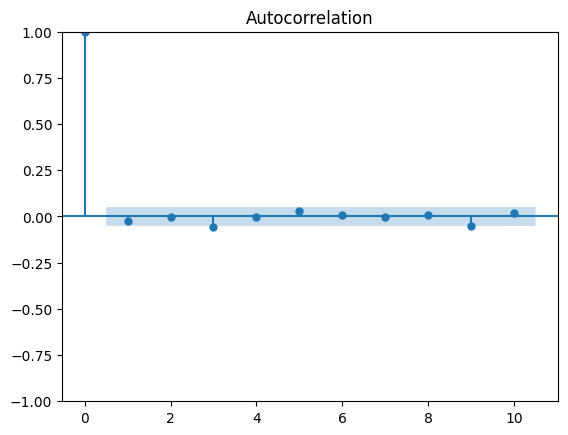

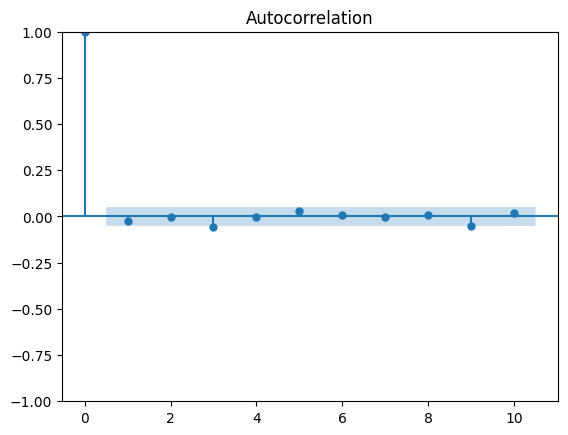

In [5]:
#ACF
sm.tsa.acf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_acf(np.diff(df['Price']),lags=10)

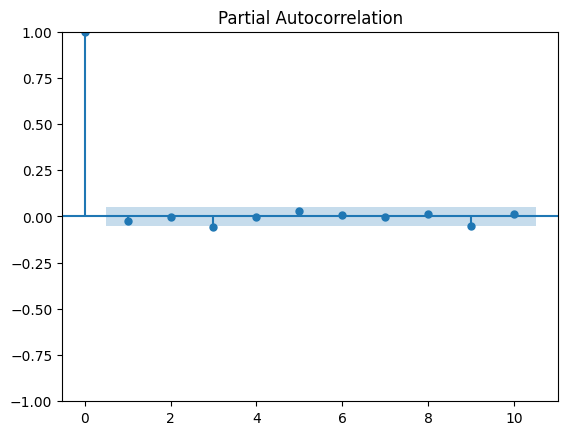

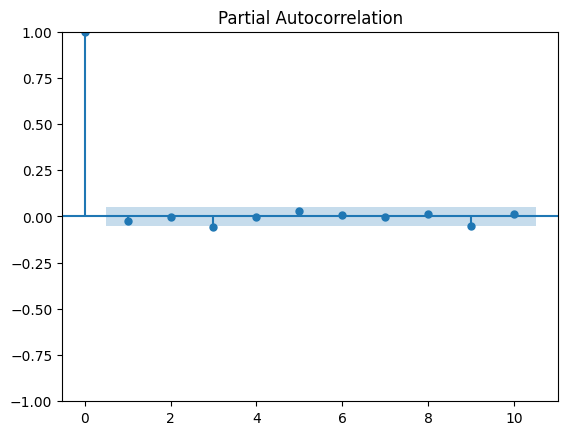

In [6]:
#PACF
sm.tsa.pacf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_pacf(np.diff(df['Price']),lags=10)

In [7]:
#RATIO 7:3

In [8]:
#data splitting ratio: 7:3
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df)) 
train_data73 = df[:train_size73]
test_data73 = df[train_size73 : train_size73 + test_size73]

In [9]:
#Training data ratio 7:3
x_train73 = np.array(train_data73.index).reshape(-1, 1)
y_train73 = np.array(train_data73['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model73 = auto_arima(y_train73, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit73 = model73.fit(y_train73)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17652.026, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17653.931, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17653.938, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17651.137, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17655.941, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.667 seconds


In [10]:
#Testing process ratio 7:3 
x_test73 = np.array(test_data73.index).reshape(-1, 1)
y_test73 = np.array(test_data73['Price'])
y_pred73 = model73.predict(n_periods=len(y_test73))

In [11]:
#creating prediction for next 30 days ratio 7:3
last_index73 =  df.index[-1]
last_data73 =pd.RangeIndex(start=last_index73, stop=last_index73+30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days73 = np.array(range(last_index73 + 1, last_index73 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days73 = model73.predict(len(x_next_30_days73))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days73)

Predicted prices for the next 30 days: 
[81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500.
 81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500.
 81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500. 81500.]


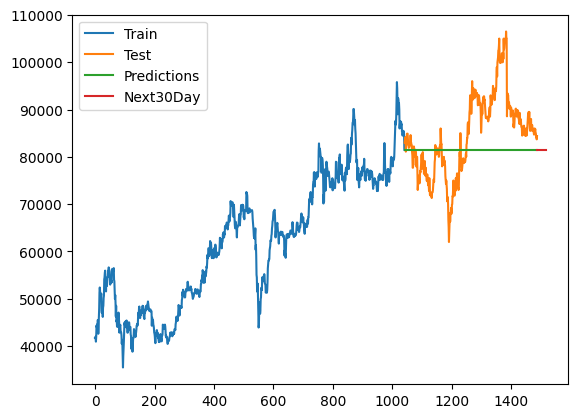

In [12]:
#Show plot ratio 7:3
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)

plt.plot(last_data73,y_next_30_days73)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [13]:
#RATIO 8:2

In [14]:
#data splitting ratio: 8:2
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df)) 
train_data82 = df[:train_size82]
test_data82 = df[train_size82 : train_size82 + test_size82]

In [15]:
#Training data ratio 8:2
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit82 = model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20224.984, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20221.267, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20223.141, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20223.146, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20219.591, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20225.135, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.676 seconds


In [16]:
#Testing process ratio 8:2 
x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Price'])à
y_pred82 = model82.predict(n_periods=len(y_test82))

In [17]:
#creating prediction for next 30 days ratio 8:2
last_index82 =  df.index[-1]
last_data82 =pd.RangeIndex(start=last_index82, stop=last_index82 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days82 = np.array(range(last_index82 + 1, last_index82 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days82 = model82.predict(len(x_next_30_days82))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days82)

Predicted prices for the next 30 days: 
[65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100.
 65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100.
 65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100. 65100.]


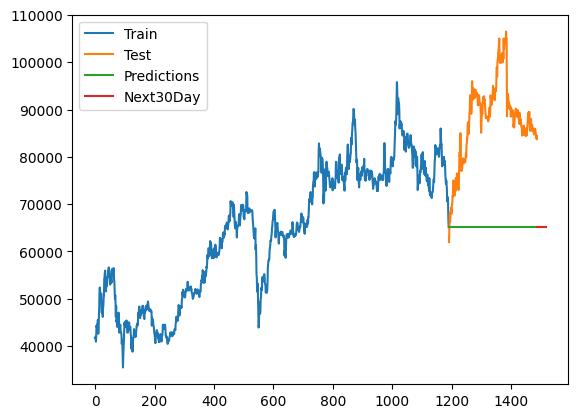

In [18]:
#Show plot ratio 8:2
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)

plt.plot(last_data82,y_next_30_days82)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [19]:
#RATIO 9:1

In [20]:
#data splitting ratio: 9:1
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df)) 
train_data91 = df[:train_size91]
test_data91 = df[train_size91 : train_size91+ test_size91]

In [21]:
#Training data ratio 9:1
x_train91 = np.array(train_data91.index).reshape(-1, 1)
y_train91 = np.array(train_data91['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model91 = auto_arima(y_train91, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit91 = model91.fit(y_train91)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22840.124, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22843.475, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22845.423, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22845.426, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22842.875, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22848.231, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22848.282, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22846.831, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22846.888, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22847.427, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22845.689, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22845.786, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22842.921, Time=1.47 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec

Best model:  ARIMA(2,1,2

In [24]:
#Testing process ratio 9:1 
x_test91 = np.array(test_data91.index).reshape(-1, 1)
y_test91 = np.array(test_data91['Price'])
y_pred91 = model91.predict(n_periods=len(y_test91))

In [25]:
#creating prediction for next 30 days ratio 9:1
last_index91 =  df.index[-1]
last_data91 =pd.RangeIndex(start=last_index91, stop=last_index91 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days91 = np.array(range(last_index91 + 1, last_index91 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days91 = model91.predict(len(x_next_30_days91))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days91)

Predicted prices for the next 30 days: 
[95033.90950074 95105.51083899 95140.14841815 95123.43979198
 95120.4212778  95172.00357928 95233.40958429 95246.95904573
 95231.1275423  95248.5475606  95307.84980282 95353.03393884
 95352.44581495 95346.13663717 95380.99830518 95438.53771502
 95466.38325694 95460.21571321 95468.07386119 95514.17584197
 95562.93572871 95576.40811647 95572.58076799 95595.09861658
 95645.10920989 95681.55217273 95686.14900721 95690.32978918
 95724.64716886 95771.97455011]


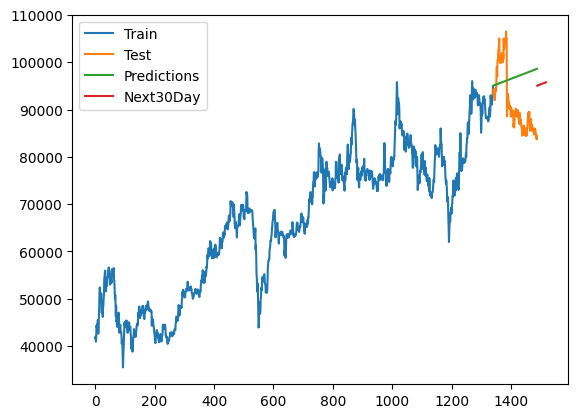

In [26]:
#Show plot ratio 9:1
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)

plt.plot(last_data91,y_next_30_days91)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [27]:
#ACCURACY EVALUATION

In [28]:
#method to calculate mape
def calc_mape(actual, predicted):

    # Convert to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate absolute percentage error
    absolute_error = np.abs((actual - predicted) / actual)
    
    # Handle division by zero cases
    absolute_error[np.isinf(absolute_error)] = 0.0
    
    # Calculate mean absolute percentage error
    mape = np.mean(absolute_error) * 100
    
    return mape

In [29]:
#accuracy evaluate 7:3
from sklearn.metrics import mean_absolute_error as mae

test_rmse73 = np.sqrt(np.mean((y_pred73 - y_test73)**2))
test_mape73 = calc_mape(y_test73, y_pred73)
test_mae73 = mae(y_test73, y_pred73)
test_msle73 = msle(y_test73, y_pred73)

print(test_rmse73)
print(test_mape73)
print(test_mae73)
print(test_msle73)

9070.298540159707
8.4877233363389
7339.840807174888
0.011238622490291901


In [30]:
#accuracy evaluate 8:2
from sklearn.metrics import mean_absolute_error as mae

test_rmse82 = np.sqrt(np.mean((y_pred82 - y_test82)**2))
test_mape82 = calc_mape(y_test82, y_pred82)
test_mae82 = mae(y_test82, y_pred82)
test_msle82 = msle(y_test82, y_pred82)

print(test_rmse82)
print(test_mape82)
print(test_mae82)
print(test_msle82)

24248.936521579857
25.233717168325853
22793.835016835015
0.09679695603187204


In [31]:
#accuracy evaluate 9:1
from sklearn.metrics import mean_absolute_error as mae

test_rmse91 = np.sqrt(np.mean((y_pred91 - y_test91)**2))
test_mape91 = calc_mape(y_test91, y_pred91)
test_mae91 = mae(y_test91, y_pred91)
test_msle91 = msle(y_test91, y_pred91)

print(test_rmse91)
print(test_mape91)
print(test_mae91)
print(test_msle91)

9052.010540480445
9.323643768120412
8336.251138071648
0.009511171294780392
